# The Probability Mass Function (PMF) - Lab

The class size paradox describes apparent contradictory findings where a total allocation of resources is fixed. 
The idea behind this paradox is that there is a difference in how events are actually distributed and how events are perceived to be distributed. These types of divergence can have important consequences for data analysis. PMFs can help resolve some of these situations as you'll learn below.

## Objectives

You will be able to:

* Understand and explain the class size paradox 
* Use PMFs to visualize actual and biased observations
* Calculate mean from PMFs to identify the expected value


## The Problem 
![](https://www.insidehighered.com/sites/default/server_files/styles/large/public/media/iStock_000021583873XSmall.jpg?itok=u_y_yItN)

At an educational establishment, the expected student-to-teacher ratio is 10:1. But randomly interviewed students often feel that their average class size is much bigger than 10. There are two main reasons for this:

1. Students typically engage in 4 - 5 classes at any given time, but teachers only teach 1 or 2 classes.
2. An obvious fact, that the number of students in a small class is small, and the number of students in a large class is large.

Due to the second fact, while randomly taking feedback from students, we would surely come across more students from larger classes.

Let's work through a set of data to re-create and analyze this paradox. 

Suppose that a college offers 65 classes in a term. We can start with the following distribution of sizes and counts:

```
 size      count
 5- 9          8
10-14          8
15-19         14
20-24          4
25-29          6
30-34         12
35-39          8
40-44          3
45-49          2
```

If the campus manager is inquired about the average class size, he would perform the following tasks:

1. Construct a PMG from given data
2. Compute the mean from calculated PMF

Let's follow the management approach first and see what expected value we get from our PMF. Here is a `size_and_count` dictionary to get you started. Calculate the pmf from this data as we have seen before. To make it slightly more straightforward, we have averaged our class sizes for each class, i.e. for size 5 - 9, we use 7 as an average.

In [1]:
size_and_count = { 7: 8, 12: 8, 17: 14, 22: 4, 
          27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

Following the approach seen in the previous lesson, calculate the PMG by normalizing each size. 

In [2]:
import numpy as np 
import collections
sum_class = np.array([8, 8, 14, 4, 6, 12, 8, 3, 2]).sum()
counter = collections.Counter(size_and_count)
pmf = []
sum_class = np.array(counter.values()).sum
for key,val in counter.items():
    pmf.append(round(val/65, 3))
    
sizes = list(counter.keys())
sizes, pmf

([7, 12, 17, 22, 27, 32, 37, 42, 47],
 [0.123, 0.123, 0.215, 0.062, 0.092, 0.185, 0.123, 0.046, 0.031])

As an additional check, these probability values must sum to 1. Let's check for that

In [3]:
np.array(pmf).sum()

1.0

## Calculate the Mean or Expected Value $E(X)$

We can now calculate the average of **Expected Value** for this distribution.

>The mean $\mu$ or expected value **E(X)** of a random variable $X$ is the sum of the possible values for $X$ weighted by their respective probabilities.

$$ E(X) = \mu = \sum_i p(x_i)x_i$$

In simple terms, you have to multiply each element in the sizes list to their probability of occurrence. You can do this using a loop.

In [20]:
x = list(counter.keys())
y = pmf
mu = 0
for a,b in zip (x,y):
    mu+=a*b
mu

23.7

So according to the campus manager, the average class size is 27. This makes a lot of sense looking at the calculation above. We can plot a PMF function based on our findings for inspections. 

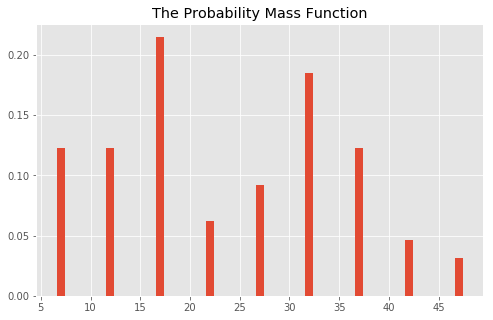

In [31]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(8,5))
plt.bar(counter.keys(), pmf);
plt.title ("The Probability Mass Function");

## Random Student Survey

Now we performed a survey on a random group of students about size of their classes, and compute the mean, according to the paradox, we observed that the average class is much bigger than 23.7. How did this happen? Let's see this in action below:

First, let's compute a distribution as a likely observation by students, where the probability associated with each class size is “biased” by the number of students in the class. Perform following tasks to introduce this bias. 

* For each class size $x$, multiply the class probability by $x$, the number of students who observe that particular class size
* Get the sum for biased class size sum

The result is a new PMF that represents the biased distribution.

In [32]:
biased = []
for s, p in zip(sizes,pmf):
    biased.append(s*p)

biased_sum = np.array(biased).sum()
biased, biased_sum

([0.861, 1.476, 3.655, 1.3639999999999999, 2.484, 5.92, 4.551, 1.932, 1.457],
 23.700000000000003)

You can now normalize the new biased list with the sum of its values, just like you did before. 
- Normalize the biased list and calculate the new PMF

In [33]:
pmf2 = []
for b in biased:
    pmf2.append(round(b/biased_sum, 3))
    
sizes, pmf2

([7, 12, 17, 22, 27, 32, 37, 42, 47],
 [0.036, 0.062, 0.154, 0.058, 0.105, 0.25, 0.192, 0.082, 0.061])

You can see that probabilities values in this PMF are different than our original pmf. Just like before, you can calulcate the expected value $\mu$.  

In [36]:
mu_biased =0
for a,b in zip (sizes,pmf2):
    mu_biased += a*b
mu_biased

29.14

## Here comes the paradox 

Here we see it, the average or expected value of biased results comes out much higher than the actual values. In some situations, a paradox like this can be mind-boggling. As an extra measure, you can inspect both PMFs side by side visually to see the differences. 

* Plot a figure with two axes
* Show pmf1 and pmf2 side by side

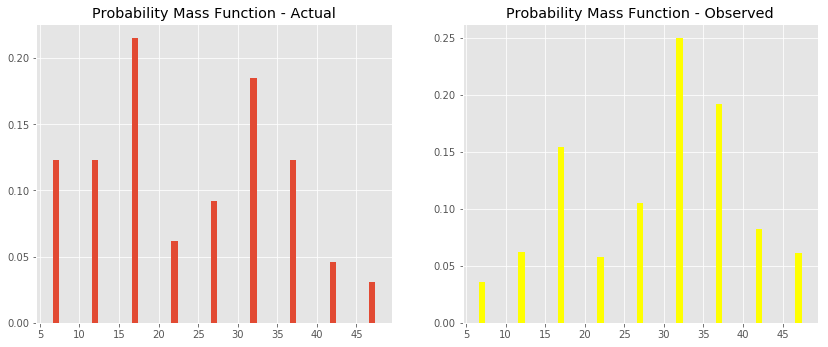

In [35]:
# Plot pmfs side by side
new_figure = plt.figure(figsize=(14,5.5))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.bar(counter.keys(), pmf);
ax2.bar(counter.keys(), pmf2, color="yellow");

ax.set_title ("Probability Mass Function - Actual");
ax2.set_title ("Probability Mass Function - Observed");

plt.show()

Your results tell you that in the biased distribution there are fewer small classes and more large classes. 

The mean of the biased distribution is 29.1, almost 25% higher than the actual mean.

To to an even more direct comparison, plot these pmfs on top of each other and change the parameter `alpha` so you can see both distributions well

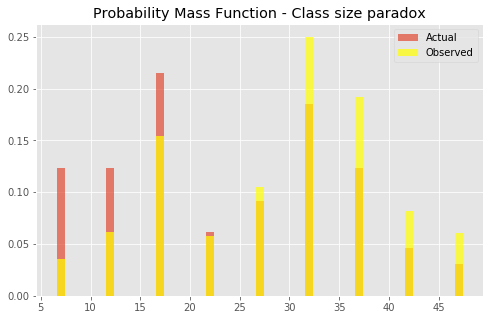

In [28]:
# Plot pmfs overlapping
plt.figure(figsize=(8,5))
plt.bar(counter.keys(), pmf, label= 'Actual', alpha = 0.7 );
plt.bar(counter.keys(), pmf2, color= "yellow", alpha = 0.7, label= 'Observed');
plt.title ("Probability Mass Function - Class size paradox");
plt.legend()
plt.show()

Here is the key. For smaller class sizes, the probability of coming across a students is lower than the actual probability. For larger classes, the probability of coming across a student is much higher than actual probability. This explains why the paradox takes place!

## Level Up - Optional

It is possible to reverse this operation. Imagine you want to find the distribution of class sizes at a campus, but you can’t get reliable data from the campus manager. You can choose a random sample of students and ask how many students are in their classes.

The result would be biased for the reasons that we have seen in this lesson. You need to write an **un-bias** function that divides each probability by $x$ instead of multiplying. Give this a try yourself!



## Summary 
In this lesson we looked at a common paradox called a "Class Size Paradox", which deals with differences in observation by different people based on their circumstances. 

Note that this phenomenon is not limited to class sizes, but may also work with other similar scenarios. This paradox can become really complicated due to the large number of involved individuals and huge variations in the probabilities of their observations, based on their settings. 